In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("outfile.txt", sep=",", nrows = 200000, usecols = [0,1], header=None)
A = df.astype(float).to_numpy();

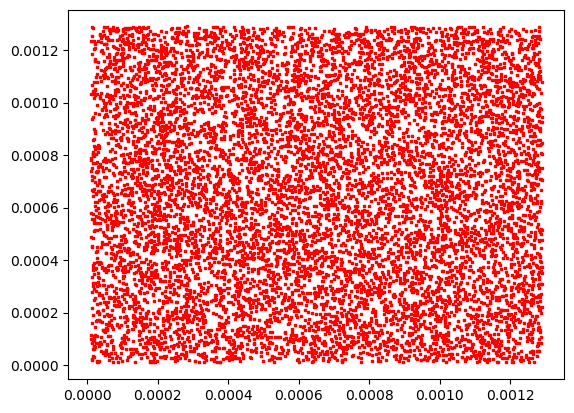

In [2]:
plt.scatter(A[:10000,0],A[:10000,1], marker=',', color = "red", s = 1);
plt.show()

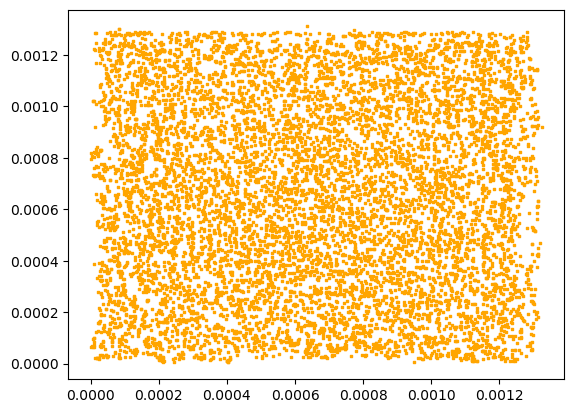

In [3]:
plt.scatter(A[10000:20000,0],A[10000:20000,1], marker=',', color = "orange", s = 1)
plt.show()

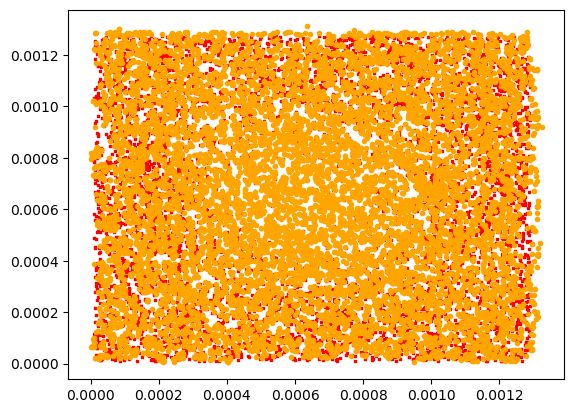

In [4]:
plt.scatter(A[:10000,0],A[:10000,1], marker=',', color = "red", s = 1);
plt.scatter(A[10000:20000,0],A[10000:20000,1], marker='.', color = "orange")
plt.show()